Testing Empirical cumulative distribution in 2-D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
import pandas as pd

df_sp500 = pd.read_csv('C:/Users/worc3920/Documents/GitHub/EmpiricalPortfolio/gspc.csv')
df_sp500 = df_sp500[["Date","Close"]]
df_sp500_copy = pd.DataFrame()

j=0
for i in range(len(df_sp500)):
    if np.int(df_sp500.loc[i,"Date"][:4]) >= 1960:
        df_sp500_copy.loc[j,"Date"] = df_sp500.loc[i,"Date"]
        df_sp500_copy.loc[j,"Close"] = df_sp500.loc[i,"Close"]
        j+= 1
df_sp500_copy.head()


df_13w = pd.read_csv('C:/Users/worc3920/Documents/GitHub/EmpiricalPortfolio/irx.csv')
df_13w = df_13w[["Date","Close"]]

def neighborImputer(df):
    for i in range(1,len(df)-1):
        if np.isnan(df.loc[i,"Close"]):            
            df.loc[i,"Close"] = df.loc[i-1,"Close"]
    return df

def weekendImputer(df_part,df_complete):
    df_ret = df_complete.copy()
    df_ret["Close"]=np.nan
    for i in range(len(df_part)):
        df_ret.loc[df_ret["Date"]==df_part.loc[i,"Date"],"Close"]=df_part.loc[i,"Close"]
        
    for i in range(1,len(df_ret)-1):
        if np.isnan(df_ret.loc[i,"Close"]):
            df_ret.loc[i,"Close"] = df_ret.loc[i-1,"Close"]
    return df_ret

df_13w = neighborImputer(df_13w)
df_sp500_copy = weekendImputer(df_sp500,df_13w)
print("Check for nan values:")
print(np.isnan(df_13w["Close"]).sum())
print(np.isnan(df_sp500_copy["Close"]).sum())

Check for nan values:
0
0


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print(len(df_sp500_copy))
print(len(df_13w))
df_sp500_copy.describe()
df_13w.describe()

18986
18986


,Close
count,18986.000000
mean,4.480252
std,3.176864
min,-0.105000
25%,2.168000
50%,4.590000
75%,6.090000
max,17.139999


In [3]:
def get1yReturn(df,ident):
    df2=pd.DataFrame()
    df2["Date"]=df["Date"].copy()
    for i in range(len(df) - 315):
        df2.loc[i,"return_"+ident] = df.loc[i+315,"Close"]/df.loc[i,"Close"]-1
    return df2.loc[0:len(df2)-316,:]       

df_13w_2 = get1yReturn(df_13w,"13w")
df_sp500_2 = get1yReturn(df_sp500_copy,"sp500")

print(np.isnan(df_13w_2["return_13w"]).sum())
print(np.isnan(df_sp500_2["return_sp500"]).sum())

0
0


In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df_13w_2.tail()
df_sp500_2.tail()
df_sp500_2.describe()
df_13w_2.describe()
df_sp500_copy.loc[df_sp500_copy["Date"]=='2019-11-03',"Close"]
df_sp500_copy.loc[df_sp500_copy["Date"]=='2020-11-03',"Close"]

,Date,return_13w
18666,2020-01-02,-0.949833
18667,2020-01-03,-0.949084
18668,2020-01-05,-0.949084
18669,2020-01-06,-0.950941
18670,2020-01-07,-0.950000


,Date,return_sp500
18666,2020-01-02,0.165044
18667,2020-01-03,0.164892
18668,2020-01-05,0.164892
18669,2020-01-06,0.170235
18670,2020-01-07,0.189878


,return_sp500
count,18671.000000
mean,0.083144
std,0.157369
min,-0.506830
25%,-0.005339
50%,0.099126
75%,0.185426
max,0.723220


,return_13w
count,18671.000000
mean,0.675036
std,5.366398
min,-1.043970
25%,-0.246794
50%,0.005825
75%,0.283125
max,118.333333


18617    3066.909912
Name: Close, dtype: float64

18922    3369.159912
Name: Close, dtype: float64

In [5]:
df = df_sp500_2[["Date","return_sp500"]]
df = df.join(df_13w_2[["Date","return_13w"]].set_index('Date'), on='Date')
print(np.isnan(df["return_13w"]).sum())
print(np.isnan(df["return_sp500"]).sum())

print(df.loc[np.argmax(df["return_13w"]),"Date"])
print(df.loc[np.argmax(df["return_sp500"]),"Date"])
df.describe()



0
0
2015-10-23
2009-03-09


,return_sp500,return_13w
count,18671.000000,18671.000000
mean,0.083144,0.675036
std,0.157369,5.366398
min,-0.506830,-1.043970
25%,-0.005339,-0.246794
50%,0.099126,0.005825
75%,0.185426,0.283125
max,0.723220,118.333333


In [6]:
df_13w.loc[df_13w["Date"]=="2015-09-29","Close"]
df_13w.loc[df_13w["Date"]=="2015-09-29","Close"]
print("2015")
df_13w.loc[df_13w["Date"]=="2015-09-28","Close"]
df_13w.loc[df_13w["Date"]=="2015-09-29","Close"]
df_13w.loc[df_13w["Date"]=="2015-09-30","Close"]
print("2016")
df_13w.loc[df_13w["Date"]=="2016-09-28","Close"]
df_13w.loc[df_13w["Date"]=="2016-09-29","Close"]
df_13w.loc[df_13w["Date"]=="2016-09-30","Close"]

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr'

df[df["return_13w"]>100]

17372    0.003
Name: Close, dtype: float64

17372    0.003
Name: Close, dtype: float64

2015


17371    0.013
Name: Close, dtype: float64

17372    0.003
Name: Close, dtype: float64

17373    0.005
Name: Close, dtype: float64

2016


17678    0.263
Name: Close, dtype: float64

17679    0.235
Name: Close, dtype: float64

17680    0.26
Name: Close, dtype: float64

,Date,return_sp500,return_13w
17198,2015-03-05,-0.040509,107.333333
17348,2015-08-31,0.078913,110.000000
17372,2015-09-29,0.143120,102.333333
17380,2015-10-08,0.064994,106.666667
17381,2015-10-09,0.062758,105.666667
17382,2015-10-11,0.062668,104.000000
17393,2015-10-23,0.006510,118.333333
17394,2015-10-25,0.004833,118.333333


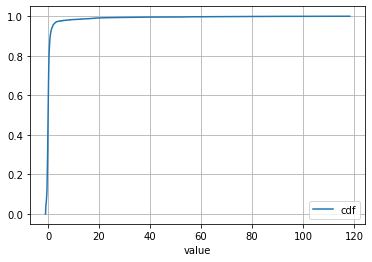

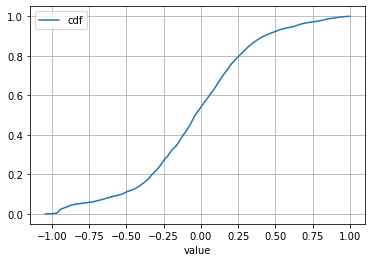

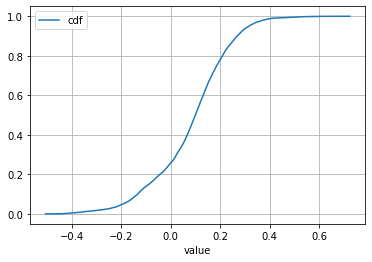

In [7]:
def getEmpiricalDensity(df,ident):
    df["value"]=df["return_"+ident]
    # Frequency
    stats_df = df \
    .groupby('value') \
    ['value'] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {'value': 'frequency'})

    # PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    # CDF
    stats_df['cdf'] = stats_df['pdf'].cumsum()
    stats_df = stats_df.reset_index()
    
    # Plot
    #stats_df.plot(x = 'value', y = 'pdf', grid = True)
    stats_df.plot(x = 'value', y = 'cdf', grid = True)

getEmpiricalDensity(df_13w_2,"13w")
df_13w_r = df_13w_2[df_13w_2["return_13w"]<1].copy()
getEmpiricalDensity(df_13w_r,"13w")
getEmpiricalDensity(df_sp500_2,"sp500")

-0.5068304382310165


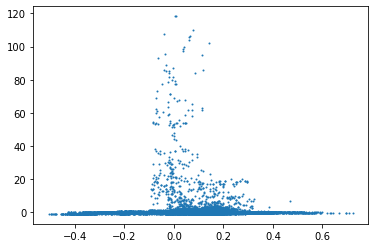

In [8]:
x1 = df["return_sp500"].to_numpy()
x2 = df["return_13w"].to_numpy()

print(np.min(x1))
ax1 = plt.scatter(x1,x2,s=1)
#ax1 =plt.plot([-0.5,0.5],[0.5,-0.5],'r')
#plt.gca().set_aspect('equal', adjustable='box')

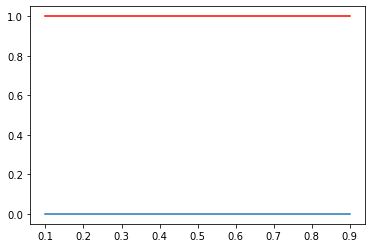

In [13]:
#Let's build a MILP
from mip import *

def myopt(alpha):
    d=2 #2-dimensional problem
    #alpha = 0.70 #significance level
    n_activeCon = np.ceil(n*alpha) #number of active constraints
    VaR = -1

    boundary = 10**6

    m = Model(solver_name=CBC)
    w = [ m.add_var(var_type=CONTINUOUS) for dd in range(d) ]
    z = [ m.add_var(var_type=BINARY) for nn in range(n) ] #deactivation switches


    #objective
    m.objective = minimize(-(w[0]*mean_x1+w[1]*mean_x2))

    #constaints
    m += xsum(w[dd] for dd in range(d)) == 1
    m += xsum(z[nn] for nn in range(n)) == (n-n_activeCon)

    for nn in range(n):
        m += w[0]*x1[nn]+w[1]*x2[nn] >= (VaR - z[nn]*boundary) #VaR constraint
    
    #obtain model summary
    #m.write('model.lp')
    #m.read('model.lp')
    #print('model has {} vars, {} constraints and {} nzs'.format(m.num_cols, m.num_rows, m.num_nz))

    # optimizing
    status = m.optimize(max_seconds=10)
    if status != OptimizationStatus.OPTIMAL:
        print(np.round(alpha,3), status)
    return m.vars[0].x

n=len(df)
k = 9
mean_x1=x1.mean()
mean_x2=x2.mean()
alphas=np.linspace(0.1,0.9,k)
w0Star=np.zeros(k)

for i in range(k):
    w0Star[i] = myopt(alphas[i])

ax2=plt.plot(alphas,w0Star)
ax2=plt.plot(alphas,1-w0Star,'r')

In [ ]:
print(-m.objective_value)
#for v in m.vars:
#       print('{} : {}'.format(v.name, v.x))

m.vars[0].x